In [1]:
#IMPORT NECESSARY PACKAGES
import CO2_functions
import CO2_Processing
import pandas as pd
from CO2_functions import *
from CO2_Processing import *
import matplotlib.pyplot as plt
import pickle
import numpy as np
pd.options.display.max_rows = 999
from datetime import datetime

In [26]:
import importlib
importlib.reload(CO2_functions)
importlib.reload(CO2_Processing)

from CO2_functions import *
from CO2_Processing import *

In [25]:
## Dump to Pickle
# with open('oct16_nov04_unsampled.pickle', 'wb') as handle:
#     pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
# Retrieve from Pickle
with open('sep24_oct03_unsampled.pickle', 'rb') as handle:
    data = pickle.load(handle)

In [16]:
data = full_download_process()

helloworld


Enter Start Date YYYY-mm-DD:  2019-08-15
Enter End Date YYYY-mm-DD:  2019-08-15


Retrieving LI_vent data
Retrieving Multiplexer data
Retrieving Vent_Anem_Temp data
Retrieving WBB Weather data
Retrieving WBB CO2 data
Initializing Drift Correct
Correcting data for LI_Vent
Correcting data for Multiplexer_CO2_1
Correcting data for Multiplexer_CO2_2
Correcting data for Multiplexer_CO2_3
Correcting data for Vent_Anem_Temp
Correcting data for WBB_Weather
Correcting data for WBB_CO2


C:\Users\agmey\Google Drive\Documents\McPherson\CO2_UnionRoof_Meyer\Code\CO2_Eddy\CO2_functions.py:1019: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Multiplexer_Weather']['Corrected_ET'] = data['Multiplexer_Weather'].apply(lambda row: row['Corrected_ET']-2,axis=1)
C:\Users\agmey\Google Drive\Documents\McPherson\CO2_UnionRoof_Meyer\Code\CO2_Eddy\CO2_functions.py:1020: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Multiplexer_Weather']['Corrected_DT'] = data['Multiplexer_Weather']['Corrected_ET'].

In [27]:
d = downsample_and_concatenate(data)
d1 = combine_vent_data(d)
d1['Vent_Mass'] = moving_mass_flow(d1['Vent_Mass'])
# for i in range(1,4):
#     d1['Multi'].loc[(d1['Multi']['CO2_{}'.format(i)] < 395)|(d1['Multi']['CO2_{}'.format(i)] > 600)] = float('NaN')
    
#d1['Multi'].interpolate(limit=1,inplace=True)
d1['Picarro'].loc[d1['Picarro']['ANEM_X'] < -20.0, 'ANEM_X'] = float('NaN')

Concatenating Picarro Data
setting night vent data to zero


In [19]:
multi=d1['Multi']
multi

,CO2_1,Multi_Loc,DOW,CO2_2,DOW,CO2_3,Temp,DOW,Rotations,Wind_Velocity,Wind_Direction,DOW
Corrected_DT,,,,,,,,,,,,
2019-08-15 09:34:19,433.04,1.0,3.0,430.11,3.0,NaN,NaN,NaN,1.0,1.01,347.0,3.0
2019-08-15 09:34:20,431.09,1.0,3.0,431.09,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-15 09:34:21,433.04,1.0,3.0,432.06,3.0,430.11,32.44,3.0,NaN,NaN,NaN,NaN
2019-08-15 09:34:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-15 09:34:23,432.06,1.0,3.0,432.06,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-15 16:48:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,6.04,359.0,3.0
2019-08-15 16:48:07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,7.04,0.0,3.0
2019-08-15 16:48:08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
#pic.set_index('Corrected_DT',inplace=True)
pic_10 = pic.resample("10T").agg(dict(Pic_CO2='max',Pic_CH4='max',ANEM_Y='mean',ANEM_X='mean',ANEM_Z='mean',Pic_Loc = 'last'))
pic_10 = wind_add(pic_10,'ANEM_X','ANEM_Y')

In [20]:
#multi = multi.set_index('Corrected_DT')
multi_re = multi.resample("1T").agg(dict(CO2_1='max',CO2_2='max',CO2_3='max',ws='mean',wd='mean'))

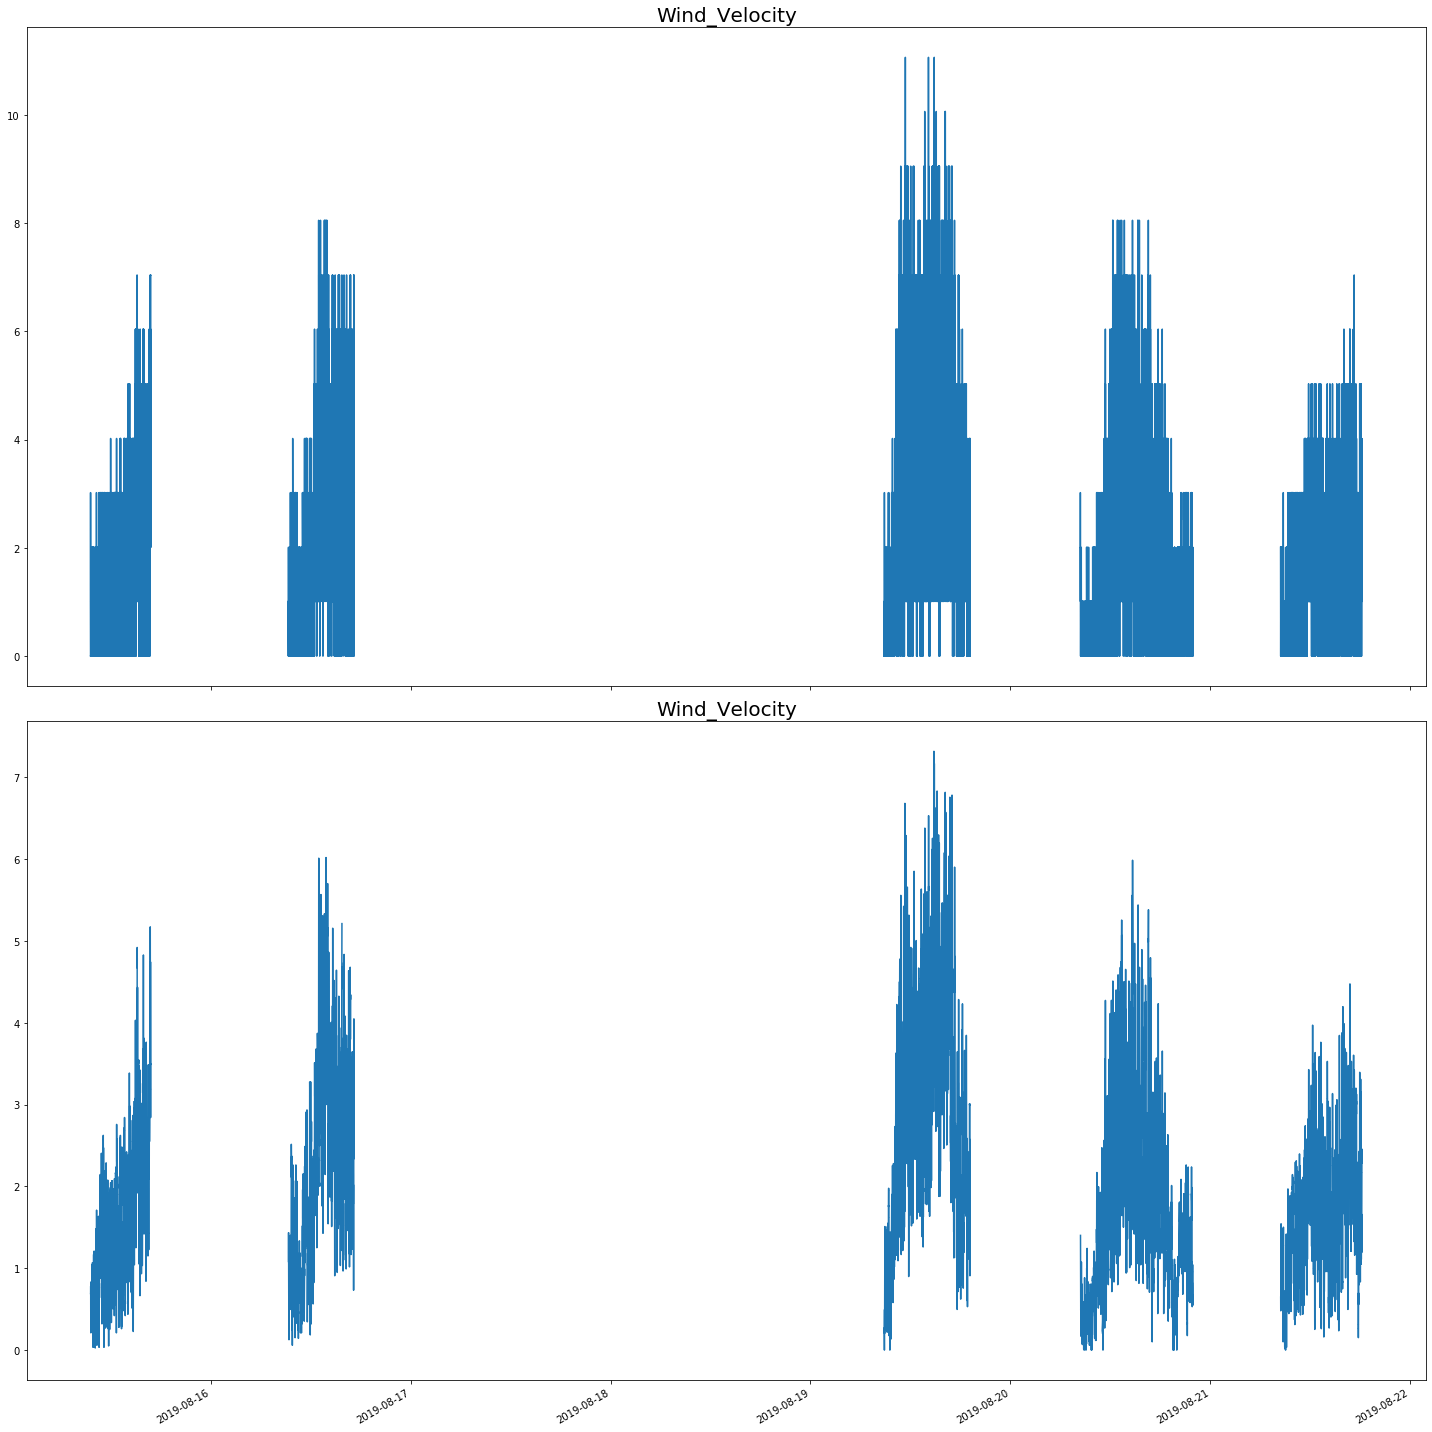

Is this an acceptable range?  n
Input Start DateTime as YYYY-mm-DD HH:MM:SS -  2019-08-16 10:00:00
Input End DateTime as YYYY-mm-DD HH:MM:SS -  2019-08-16 14:00:00


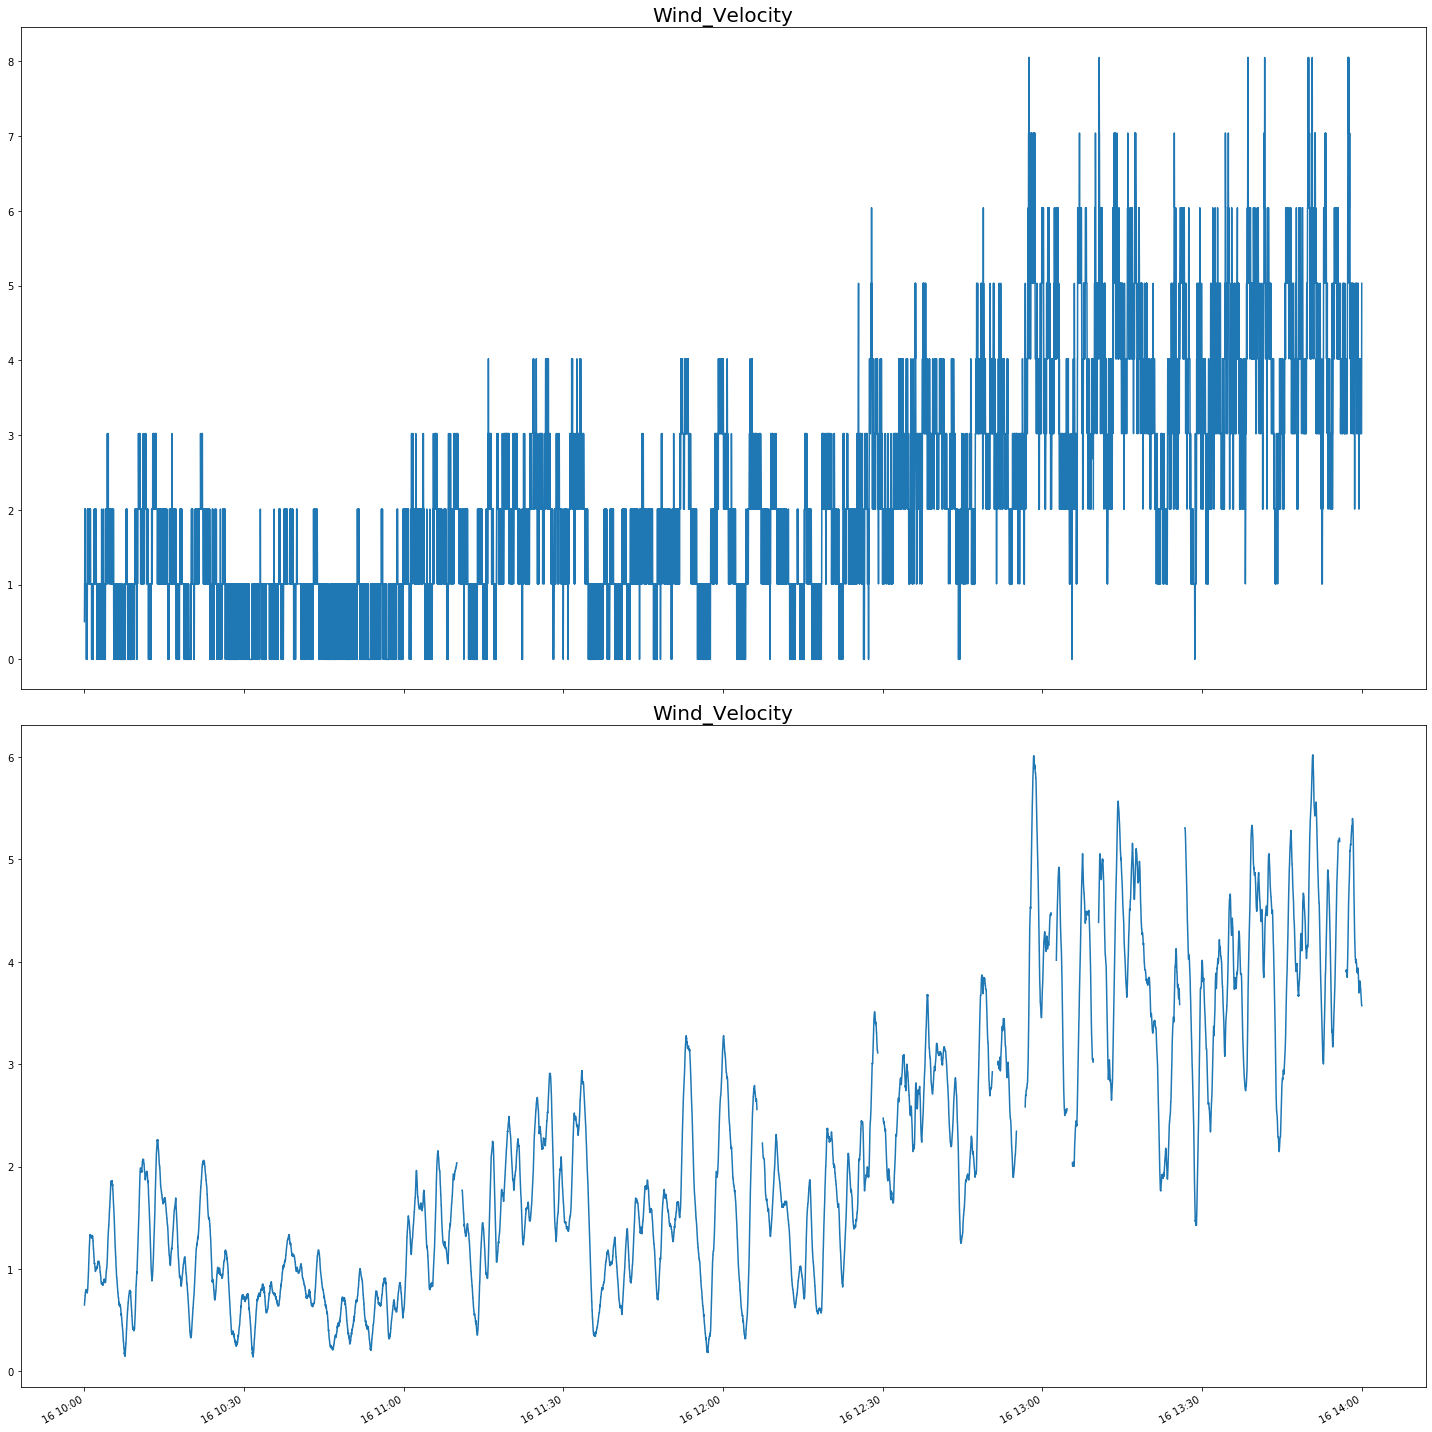

Is this an acceptable range?  y


[              Corrected_DT    CO2_1  DOW    CO2_2  DOW    CO2_3  DOW  \
 87943  2019-08-16 10:00:00  408.600  4.0  406.650  4.0  406.650  4.0   
 87944  2019-08-16 10:00:01  407.620  4.0  407.620  4.0  407.620  4.0   
 87945  2019-08-16 10:00:02  407.620  4.0  406.645  4.0  408.110  4.0   
 87946  2019-08-16 10:00:03  407.620  4.0  405.670  4.0  408.600  4.0   
 87947  2019-08-16 10:00:04  408.600  4.0  405.670  4.0  408.600  4.0   
 ...                    ...      ...  ...      ...  ...      ...  ...   
 102339 2019-08-16 13:59:56  412.510  4.0  404.690  4.0  426.200  4.0   
 102340 2019-08-16 13:59:57  405.670  4.0  420.330  4.0  410.560  4.0   
 102341 2019-08-16 13:59:58  406.645  4.0  411.530  4.0  403.715  4.0   
 102342 2019-08-16 13:59:59  407.620  4.0  404.200  4.0  396.870  4.0   
 102343 2019-08-16 14:00:00  404.690  4.0  396.870  4.0  405.670  4.0   
 
         Rotations  Wind_Velocity  Wind_Direction   Temp  Multi_loc  DOW  
 87943         0.5          0.505           296

In [9]:
plot_refinement_all([[multi,'Corrected_DT','Wind_Velocity'],[multi.rolling(60).mean(),'Corrected_DT','Wind_Velocity']],'separate')

In [11]:
multi.columns = ['Corrected_DT', 'CO2_1', 'CO2_2', 'CO2_3', 'Rotations', 'ws',
       'wd', 'Temp', 'Multi_loc']

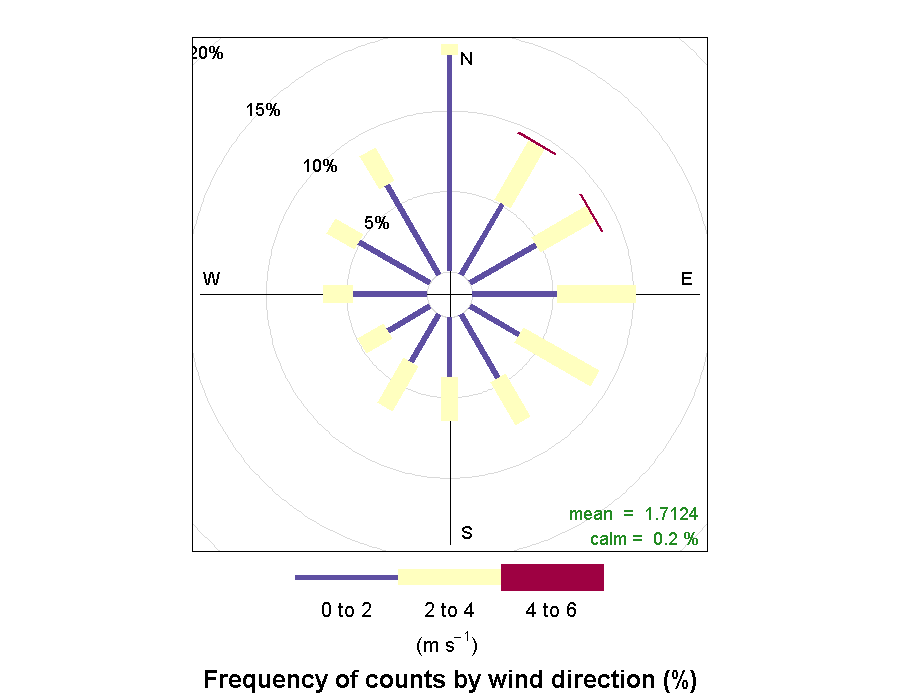

In [27]:
#Import everything to view graphics
import rpy2
import rpy2.robjects as ro
from rpy2.robjects.packages import importr
from rpy2.robjects import r, pandas2ri
from rpy2.robjects.lib import grdevices
base = importr('base')
utils = importr('utils')
import IPython
from IPython.display import Image, display
graphics = importr('graphics')
utils.chooseCRANmirror(ind=1) # select the first mirror in the list
if not ro.packages.isinstalled('openair'):
    utils.install_packages('openair')

df = multi_re

    
r=ro.r #set r object to "r"
r.library('openair') #load library openair

pandas2ri.activate() #activate the pandas to r dataframe function
r_dataframe = pandas2ri.py2ri(df) #convert pandas df to r df

with rpy2.robjects.lib.grdevices.render_to_bytesio(grdevices.png, width=900, height=700, res=150) as img: #graphical settings
    #r.polarAnnulus(r_dataframe,poll = pollutant,period='hour',main='Hour',width = 'fat')  # setup plot through r
    r.windRose(r_dataframe)#,poll='CO2_3',statistic='cpf',percentile=80)  # setup plot through r

IPython.display.display(IPython.display.Image(data=img.getvalue(), format='png', embed=True)) #display plot

In [3]:
vent_dict = {}
vent_dict['Vent_Anem_Temp'] = get_vent_anem_temp_data('Aug2019_Vent_Anem_Temp','2019-08-15','2019-11-27')
vent_dict = drift_correct(vent_dict)
vent_dict = remove_spikes(pd.read_pickle('Spike_ETs.pkl'),vent_dict)
vent_dict['Vent_Anem_Temp']['DOW'] = vent_dict['Vent_Anem_Temp']['Corrected_DT'].dt.dayofweek
vent = vent_dict['Vent_Anem_Temp'].copy()

Initializing Drift Correct
Correcting data for Vent_Anem_Temp


In [4]:
vent = vent_dict['Vent_Anem_Temp'].copy()
vent.loc[(vent['Rotations']<80)&((vent.Corrected_DT.dt.hour<10)|(vent.Corrected_DT.dt.hour>17)|(vent.DOW == 5)|(vent.DOW == 6)), ['Rotations','Velocity']]=0.0
vent_sampled = vent.set_index('Corrected_DT').resample('10S').mean().copy()
vent.interpolate(limit=1,inplace = True)